#                       Esercitazione 4 - 14 Marzo 2023

- **1.** Verificare il sistema dei numeri di macchina gestito da Python: importare il pacchetto sys. La funzione sys.float_info dà le informazioni necessarie. Stamparle e poi verificarne la validità con le formule viste a lezione: numero minimo di macchina, numero massimo di macchina, precisione di macchina 


  **N.B.** Bisogna tenere presente che c'è l'hidden bit. Quindi la mantissa più piccola da considerare $M=1.m$ dove $m=0$. Quindi il numero minimo ha mantissa $1.0$ e parte esponente $\beta^L$, quindi e' dato da $1.0 \beta^L= \beta^L$.
  
   Ragionate voi per calcolare il numero massimo di macchina, tenendo conto dell'hidden bit.


In [4]:
import sys
print(sys.float_info)
beta = sys.float_info.radix
t = sys.float_info.mant_dig
U = sys.float_info.max_exp
L = sys.float_info.min_exp
maxNum = beta**U - beta**(U-t)
minNum = beta**(L - 1)
print(maxNum, minNum)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)
179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368 2.2250738585072014e-308


- **2.**  Calcolare lo spacing in  $[2^{52}, 2^{53}]$.
    - Sia $x=2^{52}$ individuare il numero successivo a $2^{52}$ ed assegnarlo ad una variabile  y.
    - Cosa succede se consideriamo il valore z=x+0.5?
    - Cosa succede se consideriamo il valore q=y+0.5?
  

In [5]:
x = beta**52
y = (1*(beta**-1)+1*(beta**-t))*2**(52+1)
print(x, y)
z = x + 0.5     #non arrotonda
q = y + 0.5     #arrotonda
print(z, q)
spacing = beta**(52+1-t)
print(spacing)

4503599627370496 4503599627370497.0
4503599627370496.0 4503599627370498.0
1


- **3** Calcolare la cardinalità dell'insieme dei numeri finiti di Python

In [6]:
cardinalità = 2*(beta-1)*(beta**(t-1))*(U-L+1)+1
print(cardinalità)

18428729675200069633


- **4**  Verificare numericamente che $\texttt{eps} = 2^{-52}$, spacing nell'intervallo $[1, 2]$,
è il piu' piccolo $x$ tale che $fl(1 + x)$ è  diverso da $1$. Si consiglia di
visualizzare i risultati anche per differenza.


In [7]:
eps = beta**(1-t)
print(eps + 1,"diverso da 1")

1.0000000000000002 diverso da 1


- **5.** Siano $a=1.234567890123400 e+15$, $b=-1.234567890123401 e+15$, $c=0.06$. 
  Calcolare $(a+b)+c$, $(a+c)+b$, $a+(b+c)$. Che cosa si osserva? Ripetere l'esercizio con $a=0.23371258 e-4$, $b=0.33678429 e+2$, $c=-0.33677911 e+2$.

In [8]:
a=1.234567890123400e+15
b=-1.234567890123401e+15
c=0.06
#a=0.23371258e-4
#b=0.33678429e+2
#c=-0.33677911e+2
print((a+b)+c)
print((a+c)+b)
print(a+(b+c))

-0.94
-1.0
-1.0


- **6.** Si considerino le espressioni $y_1=\sqrt{x^2+1}-x$ e $y_2=\frac{1}{\sqrt{x^2+1}+x}$. Calcolare il valore di $y_1$ e $y_2$ per $x=7777$ e $x=77777777$. Che cosa si osserva? Commentare i risultati ottenuti.

In [9]:
import math
x = 77777777
y1 = math.sqrt(x**2+1)-x
y2 = 1/(math.sqrt(x**2+1)+x)
print(y1, y2)


0.0 6.428571492857143e-09


- **7.** Valutare in aritmetica floating point l'espressione
$A(x)=\frac{1}{x}-\frac{1}{(x+1)}$  nel vettore   $x=[10^0, 10^1,... ,10^{20}]$ contenente potenze successive  di $10$.
Si calcoli per ogni elemento di x l'errore relativo considerando come valore esatto quello calcolato usando  l'espressione algebricamente equivalente
$B(x)=\frac{1}{x (x+1)}$
Si visualizzi l'errore relativo in un grafico in scala logaritmica su $x$ e $y$

[0.00000000e+00 3.81639165e-16 8.21283146e-16 2.16209395e-14
 6.38647291e-14 6.25044601e-13 1.07548935e-10 9.28145750e-10
 1.03187712e-08 1.50211282e-07 6.14600376e-07 3.17244773e-08
 4.84358805e-05 9.06716545e-04 6.03525942e-03 1.39238685e-02
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00]


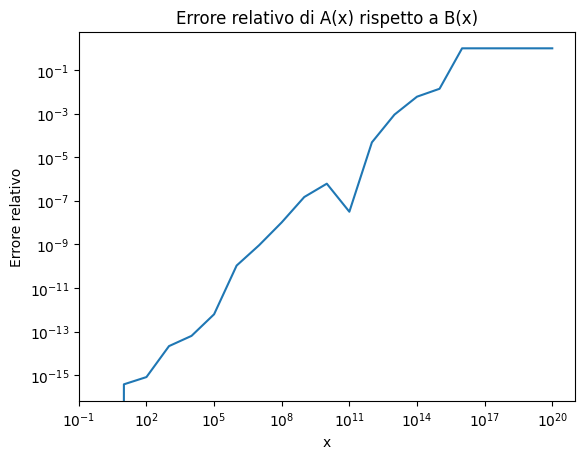

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x = np.power(10.0, np.arange(21))
A = 1/x - 1/(x+1)
B = 1/(x*(x+1)) 

rel_err = np.abs((A-B)/np.abs(B))

print(rel_err)


plt.loglog(x, rel_err)
plt.xlabel('x')
plt.ylabel('Errore relativo')
plt.title('Errore relativo di A(x) rispetto a B(x)')
plt.show()

- **8-**  Quali problemi si possono incontrare nel calcolo delle radici di $a x^2+b x+c$? Provare a risolvere l'equazione $x^2+10^k x+1=0$ con k in range(1,9). Che cosa si osserva?

In [11]:
for k in range(1,10):
    print(x**2+10**k*x+1)

[1.20000000e+01 2.01000000e+02 1.10010000e+04 1.01000100e+06
 1.00100001e+08 1.00010000e+10 1.00001000e+12 1.00000100e+14
 1.00000010e+16 1.00000001e+18 1.00000000e+20 1.00000000e+22
 1.00000000e+24 1.00000000e+26 1.00000000e+28 1.00000000e+30
 1.00000000e+32 1.00000000e+34 1.00000000e+36 1.00000000e+38
 1.00000000e+40]
[1.02000000e+02 1.10100000e+03 2.00010000e+04 1.10000100e+06
 1.01000001e+08 1.00100000e+10 1.00010000e+12 1.00001000e+14
 1.00000100e+16 1.00000010e+18 1.00000001e+20 1.00000000e+22
 1.00000000e+24 1.00000000e+26 1.00000000e+28 1.00000000e+30
 1.00000000e+32 1.00000000e+34 1.00000000e+36 1.00000000e+38
 1.00000000e+40]
[1.00200000e+03 1.01010000e+04 1.10001000e+05 2.00000100e+06
 1.10000001e+08 1.01000000e+10 1.00100000e+12 1.00010000e+14
 1.00001000e+16 1.00000100e+18 1.00000010e+20 1.00000001e+22
 1.00000000e+24 1.00000000e+26 1.00000000e+28 1.00000000e+30
 1.00000000e+32 1.00000000e+34 1.00000000e+36 1.00000000e+38
 1.00000000e+40]
[1.00020000e+04 1.00101000e+05 1.0

- **9.** Scrivere uno script Matlab che fornisca le approssimazioni di $e=\exp(1)$ ottenute con la formula
$f(n)=(1/n+1)^n$ per $n=10^k$ e  $k=0, ..., 16$. Visualizzare: un grafico con i valori di $f(n)$ al variare di n ed un grafico con i valori dell'errore relativo (considerando come valore esatto il valore math.exp(1)).  Cosa si osserva? Commentare i risultati ottenuti.

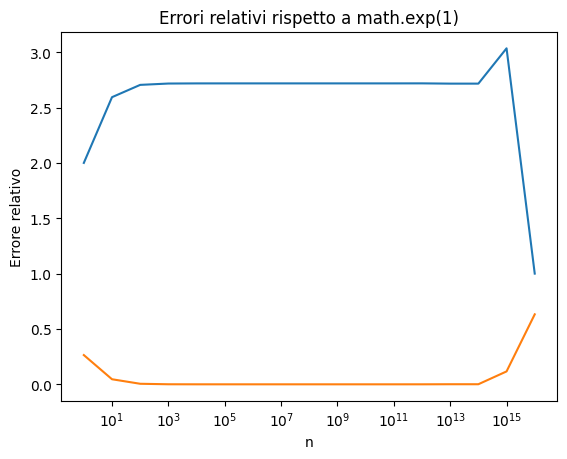

In [12]:
def f(n):
    return math.pow((1 + 1/n), n)

n_values = [10**k for k in range(17)]

e_approximations = [f(n) for n in n_values]

e_exact = math.exp(1)
relative_errors = [abs(e_approximations[i] - e_exact) / e_exact for i in range(len(e_approximations))]

plt.plot()
plt.semilogx(n_values, e_approximations)
plt.title('Approssimazioni di e con la formula f(n)')
plt.ylabel('f(n)')

plt.plot()
plt.semilogx(n_values, relative_errors)
plt.title('Errori relativi rispetto a math.exp(1)')
plt.xlabel('n')
plt.ylabel('Errore relativo')

plt.show(1)
